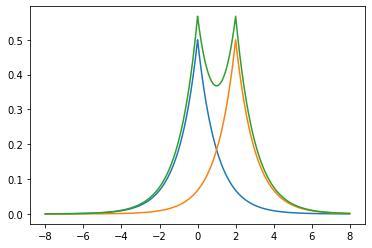

In [7]:
import matplotlib.pyplot as plt
import numpy as np  

def laplace_pdf(x, mu, lam):
    s = np.random.laplace(mu, lam, 1000)
    #count, bins, ignored = plt.hist(s, 30, density=True)
    
    #Formula of Laplace distribution
    pdf = np.exp(-abs(x-mu)/lam)/(2.*lam)

    return pdf


x = np.arange(-8., 8., .01)
mu, lam = 0., 1.

#def plt_sliding_laplace(x, num):


#pdf1 = laplace_pdf(x, mu, lam)

pdf1 = laplace_pdf(x, 0, 1)


plt.plot(x, pdf1)

pdf2 = laplace_pdf(x, 2, 1)

plt.plot(x, pdf2)

plt.plot(x, pdf1+pdf2)


# Experiment with dummy queries

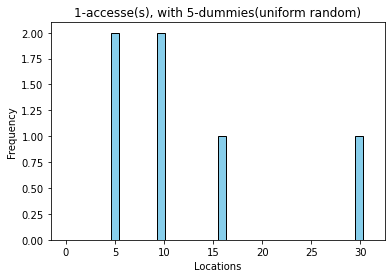

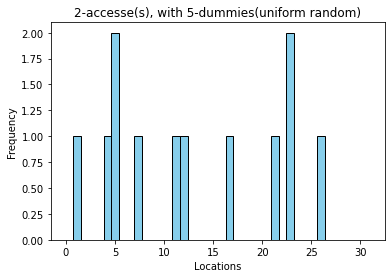

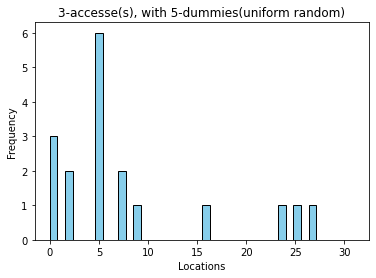

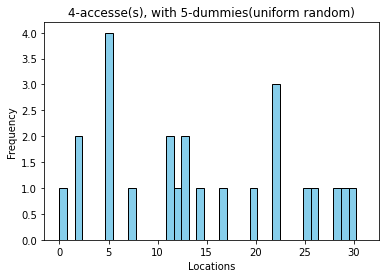

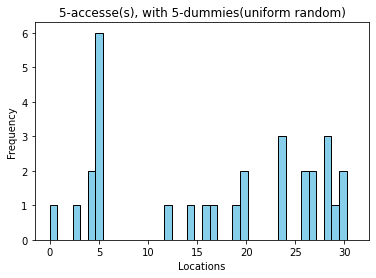

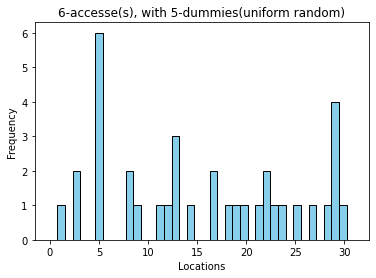

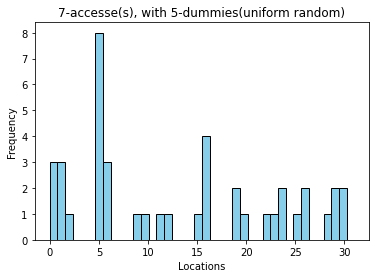

In [12]:
import matplotlib.pyplot as plt
import numpy as np

N=32

# Show the histogram of the access patterns
def show_hist(access_locations, title):
    # Plotting a basic histogram
    plt.hist(access_locations, bins=40, range=(0,(N-1)), color='skyblue', edgecolor='black')
 
    # Adding labels and title
    plt.xlabel('Locations')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # Display the plot
    plt.show()

# Access location 5 twice, anyone can detect that same item is accesses
def simplest_access():
    access_locations = []
    access_locations.append(5)
    access_locations.append(5)
    show_hist(access_locations, 'Simplest: location 5 accessed twice')

# Access location 5, num-many times
# For each access select d-dummy locations, chosen uniform randomly
def with_ur_dummy_access(num, d):
    access_locations = []
    
    for n in range(0,num):
        access_locations.append(5)
        for i in range(0,d):
            access_locations.append(int(np.random.uniform(0,(N-1),1)))
    
    show_hist(access_locations, f'{num}-accesse(s), with {d}-dummies(uniform random)')

#simplest_access()

'''
Experimented with d-dummy accesses(chosen uniform randomly) for each real access.
Observation is: with the number of same accesses(#s), the pattern reveals.
But, as d/N ratio increase, #s decreases (i.e., how quickly the pattern is visible)
'''
def exp_with_dummy_accesses():
    with_ur_dummy_access(1,5)
    with_ur_dummy_access(2,5)
    with_ur_dummy_access(3,5)
    with_ur_dummy_access(4,5)
    with_ur_dummy_access(5,5)
    with_ur_dummy_access(6,5)
    with_ur_dummy_access(7,5)

exp_with_dummy_accesses()


# $\epsilon$ calculation with Toledo's formula
## For bundeled anonymous requests
The formula is: $\epsilon = ln((\frac{d}{d-d_a}))^2)$

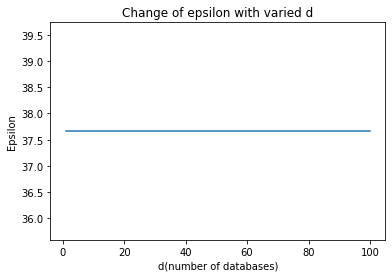

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

fx = lambda d, da, n, p, u: np.log(((d/(d-da))*(n-1)/(p-1)-(da/(d-da)))**2+u-1)-np.log(u)

def vary_p():
    d = 1
    da = 0
    n = 2**32
    plist  = np.linspace(1,100,100)
    u  = 10

    y  = [fx(d,da,n,val,u) for val in plist] # Not sure, maybe you need to use Numpy too instead ? Not a expert of Numpy

    plt.plot(plist, y)
    
    # Adding labels and title
    plt.xlabel('p(number of dummy queries per request)')
    plt.ylabel('Epsilon')
    plt.title('Change of epsilon with varied p')

def vary_d():
    dlist = np.linspace(1,100,100)
    da = 0
    n = 2**32
    p  = 10
    u  = 10

    y  = [fx(val,da,n,p,u) for val in dlist] # Not sure, maybe you need to use Numpy too instead ? Not a expert of Numpy

    plt.plot(dlist, y)
    
    # Adding labels and title
    plt.xlabel('d(number of databases)')
    plt.ylabel('Epsilon')
    plt.title('Change of epsilon with varied d')

vary_p()
vary_d()


# 1. Experiment with simplest access:
Only the requested item is fetched from $new\_loc$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

access_locations = []

def only_pick_element(acc_loc):
    access_locations.append(acc_loc)

def access_experiment(N, num):
	shuffled_items = np.arange(N)
	np.random.shuffle(shuffled_items)

	for i in range(0,num):
		acc_loc = shuffled_items[5] #Always access item 5
		only_pick_element(acc_loc)
	
def interactive_plot(N, num):
	access_locations.clear()

	access_experiment(N, num)
	
	plt.figure(figsize=(8, 4))
	plt.hist(access_locations, bins=40, range=(0,(N-1)), color='skyblue', edgecolor='black')
	plt.xlabel('Locations')
	plt.ylabel('Number of access')
	plt.title('Access histogram')
	plt.grid(True)
	plt.show()


interact(interactive_plot, N=(1,64,1), num=(0,10,1))


interactive(children=(IntSlider(value=32, description='N', max=64, min=1), IntSlider(value=5, description='num…

<function __main__.interactive_plot(N, num)>

# 2. Experiment with dummies

In a batched processing, S1 shuffles $((1+d)*b)$ requests(real and dummies are indistinguishable) and sends them one by one to S2.
\textcolor{red}{Is something revealed to S2, due to sending items one by one?}
S1 learns nothing because all requests are information-theoretically secure.
By the end of the batch processing, S2 notices that some locations (obviously having encrypted items in a shuffled order) are accessed more than others.
In total, S2 sees total $((1+d)*b)$ accesses for $\le ((1+d)*b)$ locations (i.e., some locations might get accessed more than once), producing some access pattern on encrypted items.
There could be two extreme cases:
- Case 1: All b-real requests queries for the very same item.
    Let's say the resulting access pattern is called $O_1$.
- Case 2: All b-real requests ask for b-different items, and it produces a pattern: $O_2$.

The basis of privacy would be to add uncertainty in the observable access pattern, for example in case 1, the protocol produces access pattern $O_1$.
However, $O_1$ is not a fixed value(even if the case 1 remains fixed).
Rather, it can be thought of as a random variable that is chosen randomly from a set of possible patterns $\mathcal{O}_b$.
Similarly, $O_2$ is chosen randomly from the set $\mathcal{O}_0$.

To achieve privacy, our protocol must ensure that:
\begin{gather}
\begin{aligned}
\forall{O_1} \in \mathcal{O}_b \exists O_2 \in \mathcal{O}_0
\end{aligned}     
\end{gather}
Similarly:
\begin{gather}
\begin{aligned}
\forall{O_2} \in \mathcal{O}_0 \exists O_1 \in \mathcal{O}_b
\end{aligned}     
\end{gather}

In other words, even in extreme situations as well, by looking at the access pattern ($O_1$ or $O_2$), S2 should not be able to eliminate the probability of case 1 or case 2 with complete certainty.
\textcolor{red}{If we can achieve the privacy of these extreme cases, then we will be able to keep the privacy of all the situations}.

But obviously, for most of the $O_1 \in \mathcal{O}_b$, $\Pr[O_1|Case 1] > \Pr[O_1|Case 2]$.
However, we have to ensure that they should remain within a certain limit: $\frac{\Pr[O_1|Case 1]}{\Pr[O_1|Case 2]} \le e^\epsilon$.
A similar thing should also be true for $O_2$.
To achieve this, we must ensure two things for queries of a batch:
It should be possible to access the same element x times, by accessing a specific location <x times: Indicates, multiple replicas of each element should be present.
But in this case, there is very less probability of multiple accesses for a certain location if it is case 2. So, S2 can predict it is case 2 with very high probability.
Establish mathematical relationship between epsilon, b, r(the number of replicas)
To circumvent this, for a good amount of probability, S2 must touch same location, even if the real touched locations are different: This indicates that the generated dummies by all the parties must have some commonality (maybe based on the common clocks time).


## 2.1 With d-dummies per access selected uniform randomly

For case 1 with dummies, assume all $b$-requests are for the same item, $i$, which is currently resides at the location $l_i$ within the shuffled and encrypted database.
This means that, $l_i$ will be touched by S2 at least $b$-times.
We are saying at least, because $l_i$ can also be touched due to dummy accesses as well, which are to be chosen uniform randomly.
So, for case 2, none of the elements are requested more than once (not necessarily any of them should be item-$i$).
But still, some of the locations (not necessarily $l_i$) might get touched more than once due to dummy accesses.
Now, we have to find out the probability that any location is touched $\ge b$-times for case 2.
Assume that the location is: $l_j$.

This can happen in two ways:
- Case 2.1: $l_j$ is chosen $\ge (b-1)$-times due to dummy accesses and once for the real access.
  Notice: $l_j$ cannot get accessed more than once due to real access.
- Case 2.2: $l_j$ is chosen $\ge b$-times due to dummy only

By following the binomial distribution, we can find the probability of the situation when, $l_j$ will be accessed $\ge (b-1)$-times due to dummy access is:{Obtained from ChatGPT: [https://chatgpt.com/share/674b20ec-4174-8008-997f-67e1ece3d863]}.
\begin{gather}
\begin{aligned}
\Pr[l_j \ge (b-1)]=\sum_{k=(b-1)}^{d.b} {d.b \choose k}\times {\left(\frac{1}{n}\right)}^k \times {\left(1-\frac{1}{n}\right)}^{(d.b-k)}
\end{aligned}     
\end{gather}

Now, if that location-$l_j$ is also accessed for accessing one of the $b$-real items, then the total access count of $l_j$ will be $\ge b$.
So, to figure out the probability of case 2.1, we have to find the probability that out of $b$-real queries, only $i^{th}$ query accessed $l_j$.
Assuming the user's choice is random, so this probability will be = $\left(\frac{1}{n}\right)$.
Since, it is known that in case 2, no two queries are same, so the situation: any of the $b$-real queries can touch $l_j$ may occur in $b$-ways only.
That is, it can happen for the 1st query, for 2nd query..for $b^{th}$-query, but no two queries will be same.
As a result, $\Pr[Any\ of\ the\ b-real\ queries\ touches\ l_j]=\frac{b}{n}$
That means,
\begin{gather}
\begin{aligned}
\Pr[Case 2.1]=\frac{b}{n}.\Pr[l_j \ge (b-1)] = \frac{b}{n}.\sum_{k=(b-1)}^{d.b} {d.b \choose k}\times {\left(\frac{1}{n}\right)}^k \times {\left(1-\frac{1}{n}\right)}^{(d.b-k)}
\end{aligned}     
\end{gather}

On the other hande, the probability of Case 2.2 is:
\begin{gather}
\begin{aligned}
\Pr[Case 2.2]=\sum_{k=b}^{d.b} {d.b \choose k}\times {\left(\frac{1}{n}\right)}^k \times {\left(1-\frac{1}{n}\right)}^{(d.b-k)}
\end{aligned}     
\end{gather}


For each real request, $d$-dummy requests are made.
So, for $b$-real requests, $b\times d=bd$-dummy requests are made.
$bd$-dummies can be chosen among $n$ locations in $n \choose bd$ ways.

***Here, for case 1, for sure one particular location will be accessed $\ge b$-times for sure.
But for case 1, there is a very good chance that, none of the locations will be accessed $\ge b$-times.
And in that time the privacy will be revealed.***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

access_locations = []

def real_with_uniform_random_dummies(N, d, shuffled_items, access_item):

    # Access the requested item from the shuffled location
    access_locations.append(shuffled_items[access_item])

    # Then add d-number of dummy requests
    for i in range(0,d):
        access_locations.append(shuffled_items[int(np.random.uniform(0,(N-1),1))])

def access_experiment(N, d, num):
    #Clear the global histogram array from previous simulation
    access_locations.clear()
    
    # Create the random shuffling of the items
    shuffled_items = np.arange(N)
    np.random.shuffle(shuffled_items)

    for i in range(0,num):
        access_item = 5 #Always access item 5 for this experiment
        real_with_uniform_random_dummies(N, d, shuffled_items, access_item)
	
def interactive_plot(N, d, num):

	access_experiment(N, d, num)
	
	plt.figure(figsize=(8, 4))
	plt.hist(access_locations, bins=40, range=(0,(N-1)), color='skyblue', edgecolor='black')
	plt.xlabel('Locations')
	plt.ylabel('Number of access')
	plt.title('Access histogram')
	plt.grid(True)
	plt.show()

interact(interactive_plot, N=(1,64,1), d=(0,10,1), num=(0,10,1))

# 3. Experiment with replicas

## 3.1 Experiment with r-number of replicas of each element

Assume, the replicas are chosen uniform randomly.
At first, suppose $r < b$. 

In Case 1, there is a chance that all $b$-requests are fetched from only one replica.
On the other extreme situation, all the items will be accessed uniformly.
So, maximum touch count for case 1: $\lceil \frac{b}{r} \rceil \le \max{\ddot{\mathcal{T}}(l_i):i \in [N]}\le b$
Now, if $r \ge b$, then the lower limit of $\max{\ddot{\mathcal{T}}(l_i)}$ becomes 1.
And if $r \gg b$, then the probability of $\max{\ddot{\mathcal{T}}(l_i)} = 1$ becomes significant.

On the otherhance, in case 2, since no item is accessed twice, none of the locations should be touched more than once.

So, here also Case 1 and Case 2 are distinguishible, unless $r \gg b$, which is little impractical.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

access_locations = []

def pick_real_among_replicas(N, r, shuffled_items, access_item):
    #Uniform randomly choose the replica number and accordingly determine the access location
    acc_loc = shuffled_items[access_item + N*int(np.random.uniform(0,r-1,1))]
    
    access_locations.append(acc_loc)

def access_experiment(N, r, num):
    #Clear the global histogram array from previous simulation
    access_locations.clear()
    
    # Create the random shuffling of the items, here all N*r items will be shuffled
    shuffled_items = np.arange(N*r)
    np.random.shuffle(shuffled_items)

    for i in range(0,num):
        access_item = 5 #Always access item 5 for this experiment
        pick_real_among_replicas(N, r, shuffled_items, access_item)
	
def interactive_plot(N, r, num):

	access_experiment(N, r, num)
	
	plt.figure(figsize=(8, 4))
    
    # Since there are r number of replicas for each element, so there will be r*N locations
	plt.hist(access_locations, bins=40, range=(0,(r*N-1)), color='skyblue', edgecolor='black')
	plt.xlabel('Locations')
	plt.ylabel('Number of access')
	plt.title('Access histogram')
	plt.grid(True)
	plt.show()

interact(interactive_plot, N=(1,64,1), r=(1,10,1), num=(0,10,1))

interactive(children=(IntSlider(value=32, description='N', max=64, min=1), IntSlider(value=5, description='r',…

<function __main__.interactive_plot(N, r, num)>

# 4. Combination of dummies and replicas

## 4.1 r-number of replicas per item and d-dummy requests are issued per item (i.e., combine 2.1 and 3.1) [TODO]
Here each item is replicated r-times and kept in r-unrelated locations.
So, as section 3.1, S2 holds a shuffled database of size $(r*N)$, storing encrypted items.
Each real items are fetched from one of its $r$-available locations(which are uncorrelated), chosen uniform randomly.

For the dummies, first the dummy item($i_d$) is chosen uniform randomly from the set: $[0,(N-1)]$ and then accessed from one of its $r$-available locations, again chosen uniform randomly.
So for choosing dummies, uniform random choice occurs twice.
***Is it same as choosing the item once, uniform randomly among $(r*N)$ locations? Assuming the answer is yes at this moment.***

If the assumption is true, then case 2 means, total $b$-real requests and $b*d$-dummies, that is total $b(1+d)$ items will be fetched uniform randomly from $(r*N)$-available locations.
Assumption is, b-different real items are chosen randomly.
So, we can use the formula of section 2.1 to calculate the probability of accessing the same location.
Now, here note, if the choices of dummies are reduced then there is a chance of seeing more number of common accesses.
But then, along with that if the real accesses becomes case 1, then there will be two spikes in the histogram and the situation will be distinguishible.
We need some mechanism, so that if number of same real accesses increases, then the number of common dummy decrease and vice versa.

### 4.1.1 Dummies from only one replica-set
One option is to uniform randomly choose real items among their r-replicas but all the dummies are chosen uniform randomly only from one replica set.
Which means, the choice of dummies will become $N \choose bd$, instead of $Nr \choose bd$.
So the chance of multiple access of one location will increase. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

access_locations_c1 = []
access_locations_c2 = []

def pick_real_among_replicas(N, r, shuffled_items, access_item, access_locations):
    #Uniform randomly choose the replica number and accordingly determine the access location
    acc_loc = shuffled_items[access_item + N*int(np.random.uniform(0,r-1,1))]
    
    access_locations.append(acc_loc)

def pick_dummies_from_fixed_set(N, d, shuffled_items, drset, access_locations):

    # TODO, how to choose the dummies are to be investigated
    for i in range(0,d):
        d_loc = shuffled_items[drset*N + int(np.random.uniform(0,(N-1),1))]
        access_locations.append(d_loc)

# Accessed items are all same

def case1(N, r, d, num):
    #Clear the global histogram array from previous simulation
    access_locations_c1.clear()

    # Create the random shuffling of the items, here all N*r items will be shuffled
    shuffled_items = np.arange(N*r)
    np.random.shuffle(shuffled_items)

    #Choose a random replica set, from which all the dummies will be chosen
    drset= int(np.random.uniform(0,r-1,1))
    
    for i in range(0,num):
        access_item = 5 #Always access item 5 for this experiment

        #Choose real item among multiple replicase
        pick_real_among_replicas(N, r, shuffled_items, access_item, access_locations_c1)

        #Choose dummies from same set, which will increase the chance of touching same items more number of times
        pick_dummies_from_fixed_set(N, d, shuffled_items, drset, access_locations_c1)

# Accessed items are all different
def case2(N, r, d, num):
    #Clear the global histogram array from previous simulation
    access_locations_c2.clear()

    # Create the random shuffling of the items, here all N*r items will be shuffled
    shuffled_items = np.arange(N*r)
    np.random.shuffle(shuffled_items)

    #Choose a random replica set, from which all the dummies will be chosen
    drset= int(np.random.uniform(0,r-1,1))

    # Choose num different items in between 0 and (N-1)
    access_items = np.random.choice(N, num, False)
    
    for i in range(0,num):
        access_item = access_items[i]

        #Choose real item among multiple replicase
        pick_real_among_replicas(N, r, shuffled_items, access_item, access_locations_c2)

        #Choose dummies from same set, which will increase the chance of touching same items more number of times
        pick_dummies_from_fixed_set(N, d, shuffled_items, drset, access_locations_c2)

def interactive_plot(N, r, d, num):

    case1(N, r, d, num)
    case2(N, r, d, num)
    
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
    #plt.figure(figsize=(16, 8))
    ax1.hist(access_locations_c1, bins=40, range=(0,(r*N-1)), color='skyblue', edgecolor='black')
    ax1.set_title('Accessed items are all same')
    ax1.set_xlabel('Locations')
    ax1.set_ylabel('Number of accesses')

    ax2.hist(access_locations_c2, bins=40, range=(0,(r*N-1)), color='skyblue', edgecolor='black')
    ax2.set_title('Accessed items are all different')
    ax2.set_xlabel('Locations')
    ax2.set_ylabel('Number of accesses')

interact(interactive_plot, N=(1,256,1), r=(1,10,1), d=(0,10,1), num=(0,20,1))

interactive(children=(IntSlider(value=128, description='N', max=256, min=1), IntSlider(value=5, description='r…

<function __main__.interactive_plot(N, r, d, num)>

### 4.1.2 Dummies from a subset of the one replica-set
Other option is to uniform randomly choose the dummies from a (random)subset of size $s$.
Which means, the choice of dummies will become $s \choose bd$, instead of $N \choose bd$.
If the chosen $s < bd$, then some locations will be accessed definitely more than once.
So the chance of multiple access of one location will increase even more.
For each batch, this subset must be changed otherwise, quickly, S2 will become sure about the elements which are dummies.
So, at the beginning of each batch, S1 may determine a random replica set and then a secret random set of size $s$, which will be used for generation of $bd$-dummies.

- Situation 1:
With this strategy, for case 1, for the real queries, there could be from $r$-towers (having height $\lceil \frac{b}{r} \rceil$) to 1 tower (having height b).
For dummies, there could be from $s$-towers (having height $\lceil \frac{bd}{s} \rceil$) to 1 tower (having height bd).

- Situation 2:
With this strategy, for case 2, for the real queries, there will always be $b$-towers having height 1.
For dummies, there could be from $s$-towers (having height $\lceil \frac{bd}{s} \rceil$) to 1 tower (having height bd).

The goal is to make situation 1 and situation 2 indistinguishible.

Instead, if we redefine case 1? Instead of accessing one item b-times, if we redefine case 1 as, within a batch (b-1)-items are unique but one item is accessed twice.
And then can we extend this idea over multiple batches? And can we analyze the privacy leakage in the case of a certain number of same element access?
With this updated case 1 (say it case 1'), situation 1(say it situation 1') becomes something like the following:

- Situation 1':
For case 1', for the real queries, there could be from $(b-1)$-towers (one of them having height 2 and rest of them of height 1) to $b$ towers (all having height 1)(because even if same item is accessed twice, those are accessed from different replicas).
For dummies, there could be from $s$-towers (having height $\lceil \frac{bd}{s} \rceil$) to 1 tower (having height bd).

Now, does the concept of batching make sense? Or, clients will send request one by one and S1 will add d-dummies, shuffle them together and send that small batch to S2?

What do we want? Irrespective of whether some common items are accessed or not, there should be some common location accesses due accross a few queries, which are issued in close time.
This can be achieved by generating dummies according to some non-uniform distribution (e.g., laplace distribution).
Suppose, S1 chooses a random and non-overlapping subset S during each query for dummy generation.
And then generates d-dummies using laplace distribution.
Which means, for i-th query most of the queries will be fetched from current set, but with some probability the dummies will be chosen from the past sets (i-1)th, (i-2)th... as well as from future sets (i+1)th, (i+2)th sets.
That means, if s is small, then there is a good chance of accessing some common locations, especially there is a higher chance of accessing items which are recently accessed.
On the other hand, if some locations are accessed twice but after significant amount of time, then it means with high probability those are accessed because in both the cases same real elements were actually accessed.
Because, for the dummies timewise far apart elements are not supposed to be accessed with high probability.

But if we do something like, the content of the locations are changed due to the background process, which are accessed after a significant time (this is what we want to achieve using our protocol), then the probability that both the elements are same, can be reduced.

This possibly suggests that, even if there are r-replicas, we should not use uniform random distribution while choosing the replicas.
Instead we may try to choose replicas with non-random distribution (e.g., laplace noise).